# Malware Analysis With Machine Learning - Random Forest

In [42]:
#xử lý dữ liệu
import numpy as np 
import pandas as pd
#Chia dữ liệu, huấn luyện mô hình, và đánh giá
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
#Đánh giá hiệu năng mô hình (confusion matrix, precision-recall, và ROC)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
from sklearn.metrics import roc_curve, RocCurveDisplay, auc, classification_report
#Vẽ biểu đồ
import matplotlib.pyplot as plt

Đọc dataset :

In [43]:
#Đọc dataset từ file csv
data = pd.read_csv('../Malware-Detection-Using-Machine-Learning/data-set/MalwareDataSet.csv') 

In [44]:
# Hiển thị dataset để kiểm tra dữ liệu ban đầu
data

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0,10407,9,6,6,33088,262144,4,952,1
1,5354,9,6,6,33088,262144,4,952,1
2,58807,9,6,6,33088,262144,4,136490,1
3,25166,9,6,6,33088,262144,4,1940,1
4,70387,9,6,6,33088,262144,4,83098,1
...,...,...,...,...,...,...,...,...,...
137439,123291,11,0,5,33088,1048576,5,81654,0
137440,40000,2,6,1,32768,1048576,8,67624,0
137441,59610,10,0,5,33088,1048576,5,22648,0
137442,51216,2,0,1,0,1048576,8,2216,0


In [45]:
# Xem kích thước của dataset (số dòng, số cột)
data.shape

(137444, 9)

In [46]:
# Thống kê dữ liệu (min, max, mean,...)
data.describe()

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
count,1.374440e+05,137444.000000,137444.000000,137444.000000,137444.000000,1.374440e+05,137444.000000,1.374440e+05,137444.000000
mean,1.722186e+05,8.620784,68.731876,5.098738,22301.043436,9.306841e+05,4.997119,2.474766e+05,0.297707
std,3.438014e+06,4.095635,1185.709873,99.437584,15444.753219,5.553175e+05,1.917237,2.129516e+07,0.457252
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,1.272100e+04,8.000000,0.000000,4.000000,320.000000,1.048576e+06,4.000000,2.216000e+03,0.000000
50%,5.300800e+04,9.000000,0.000000,5.000000,33088.000000,1.048576e+06,5.000000,9.640000e+03,0.000000
75%,6.157800e+04,10.000000,6.000000,5.000000,33088.000000,1.048576e+06,5.000000,2.376250e+04,1.000000
max,1.074484e+09,255.000000,28619.000000,36868.000000,49504.000000,3.355443e+07,40.000000,4.294903e+09,1.000000


In [47]:
# Đếm số lượng mẫu trong từng lớp (malware và legitimate)
data.groupby(data['legitimate']).size()

legitimate
0    96526
1    40918
dtype: int64

Có tổng cộng 137.444 mẫu. Gồm 96.526 vô hại and 40.918 mã độc.

In [48]:
# Tách 8 cột đầu tiên làm thuộc tính (features)
features = data.iloc[:,[0,1,2,3,4,5,6,7]].values 

In [49]:
features

array([[  10407,       9,       6, ...,  262144,       4,     952],
       [   5354,       9,       6, ...,  262144,       4,     952],
       [  58807,       9,       6, ...,  262144,       4,  136490],
       ...,
       [  59610,      10,       0, ..., 1048576,       5,   22648],
       [  51216,       2,       0, ..., 1048576,       8,    2216],
       [  22731,      11,       0, ..., 1048576,       5,  318464]])

In [50]:
# Tách cột cuối cùng (legitimate) làm nhãn (labels) safe & malware
ifMalware = data.iloc[:,8].values 

In [51]:
ifMalware

array([1, 1, 1, ..., 0, 0, 0])

Sử dụng 75% dataset để huấn luyện và 25% cho kiểm tra :

In [52]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (75% train, 25% test)
features_train, features_test, ifMalware_train, ifMalware_test = train_test_split(features, ifMalware, test_size=0.25)

Học và dự đoán kết quả :

In [53]:
# Khởi tạo mô hình Random Forest
rfModel = RandomForestClassifier() 

In [54]:
# Huấn luyện mô hình với tập dữ liệu huấn luyện
rfModel.fit(features_train, ifMalware_train) 

RandomForestClassifier()

In [55]:
# Dự đoán trên tập dữ liệu kiểm tra
rfPredict = rfModel.predict(features_test) 

Đưa ra kết quả :

In [56]:
# Tính và in số lượng dự đoán sai
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifMalware_test != rfPredict).sum()))

Number of mislabeled out of a total of 34361 test entries: 311


In [57]:
# Tính F1-score để đo lường độ chính xác của mô hình
successRate = 100 * f1_score(ifMalware_test, rfPredict, average='micro')

In [58]:
# In ra kết quả độ chính xác
print("The Success Rate was calculated as % : " + str(successRate) + " with the Random Forest")

The Success Rate was calculated as % : 99.0949041063997 with the Random Forest


Visualization :

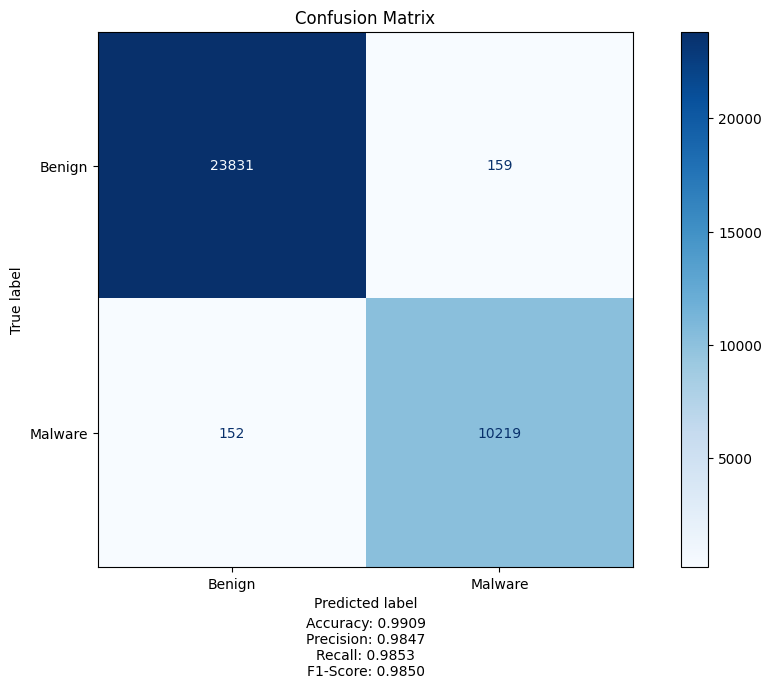


Confusion Matrix Details:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99     23990
     Malware       0.98      0.99      0.99     10371

    accuracy                           0.99     34361
   macro avg       0.99      0.99      0.99     34361
weighted avg       0.99      0.99      0.99     34361



In [59]:
# Visualization 1: Confusion Matrix
y_pred = rfModel.predict(features_test)
cm = confusion_matrix(ifMalware_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malware'])
fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

# Thêm thông số chi tiết
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

plt.text(0.5, -0.15, 
         f'Accuracy: {accuracy:.4f}\n'
         f'Precision: {precision:.4f}\n'
         f'Recall: {recall:.4f}\n'
         f'F1-Score: {f1_score:.4f}', 
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Details:")
print(classification_report(ifMalware_test, y_pred, target_names=['Benign', 'Malware']))

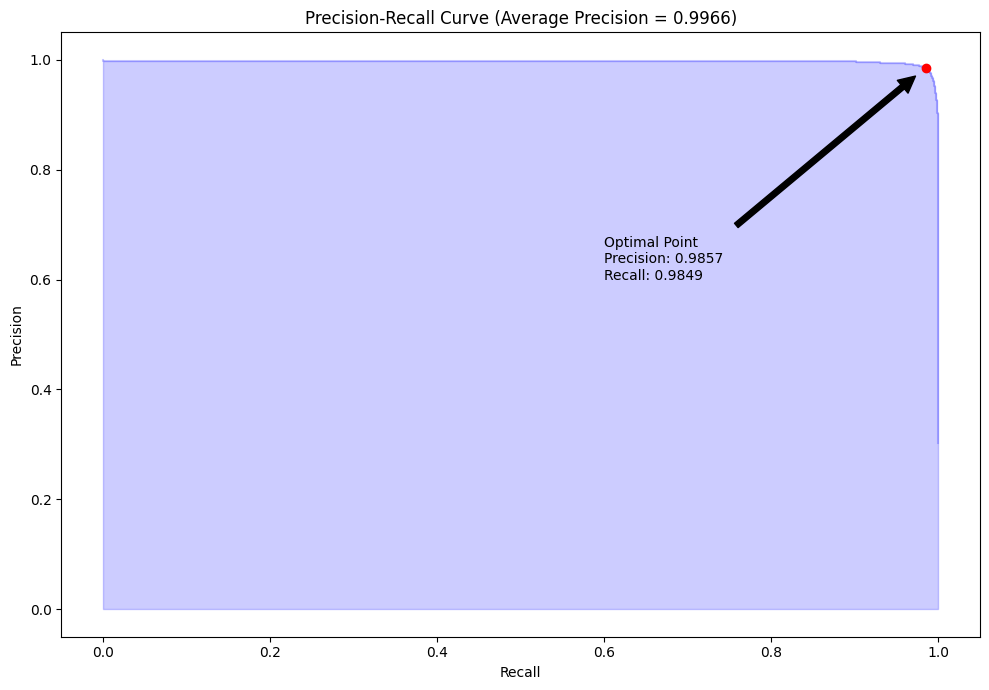


Precision-Recall Curve Details:
Average Precision Score: 0.9966
Optimal Precision: 0.9857
Optimal Recall: 0.9849


In [60]:
# Visualization 2: Precision-Recall Curve
y_scores = rfModel.predict_proba(features_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(ifMalware_test, y_scores)
avg_precision = average_precision_score(ifMalware_test, y_scores)

plt.figure(figsize=(10, 7))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Average Precision = {avg_precision:.4f})')

# Tìm điểm tối ưu
optimal_idx = np.argmax(precision[:-1] * recall[:-1])
plt.plot(recall[optimal_idx], precision[optimal_idx], 'ro')
plt.annotate(f'Optimal Point\nPrecision: {precision[optimal_idx]:.4f}\nRecall: {recall[optimal_idx]:.4f}', 
             xy=(recall[optimal_idx], precision[optimal_idx]), 
             xytext=(0.6, 0.6),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

print("\nPrecision-Recall Curve Details:")
print(f"Average Precision Score: {avg_precision:.4f}")
print(f"Optimal Precision: {precision[optimal_idx]:.4f}")
print(f"Optimal Recall: {recall[optimal_idx]:.4f}")

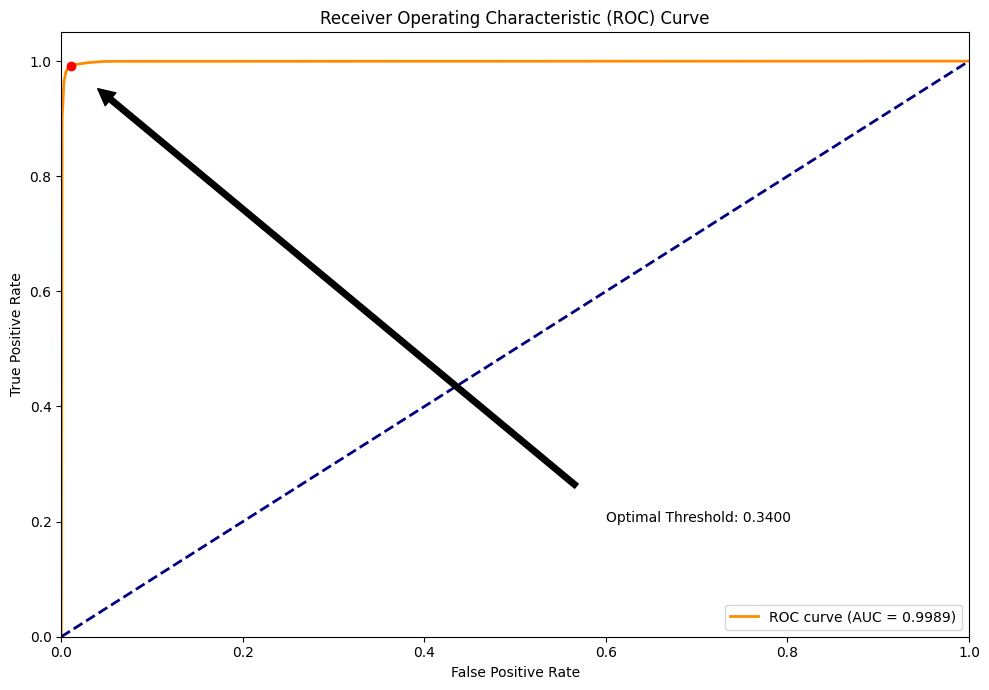


ROC Curve Details:
AUC (Area Under Curve): 0.9989
Optimal Threshold: 0.3400
Best True Positive Rate: 0.9907
Corresponding False Positive Rate: 0.0107


In [62]:
# Visualization 3: ROC Curve
fpr, tpr, thresholds = roc_curve(ifMalware_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Tìm điểm tối ưu
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro')
plt.annotate(f'Optimal Threshold: {optimal_threshold:.4f}', 
             xy=(fpr[optimal_idx], tpr[optimal_idx]), 
             xytext=(0.6, 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

print("\nROC Curve Details:")
print(f"AUC (Area Under Curve): {roc_auc:.4f}")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Best True Positive Rate: {tpr[optimal_idx]:.4f}")
print(f"Corresponding False Positive Rate: {fpr[optimal_idx]:.4f}")